# Analysis on NVIDIA Stock Price Change on US Unemployment Rate (With S&P500 as a benchmark)
Over the past decade, AI has become one of the hottest sectors in the world. Companies are investing large amounts into AI infrastructure, which has created a large demand for NVIDIA products. As companies integrate more AI into their infrastructure, we expect them to replace certain jobs. Our hypothesis is that the increase in demand for NVIDIA products will lead to higher US unemployment. I am also planning to use the S&P 500 as a benchmark to measure the overall economy’s health to help with noise. 

In [1]:
import os
from dotenv import load_dotenv
from config import fred_api_key, UNRATE_DATASET, SPY_DATASET, NVIDIA_DATASET
from load import get_fred_data, get_stock_data
from analyze import plot_statistics
from process import process_fred_data, process_stock_data
from matplotlib import pyplot as plt

# FRED Data

In [2]:
# --- FRED Data ---
fred_data = get_fred_data(UNRATE_DATASET, '2000-01-01', '2025-11-01', fred_api_key)
process_fred_data(fred_data, 'Unemployment Rate')


--- Extracting data from FRED: UNRATE ---
Extracting UNRATE...
--- Processing data from Unemployment Rate Dataset
Processing Unemployment Rate


,Date,Unemployment Rate
0,2000-01-01,4.0
1,2000-02-01,4.1
2,2000-03-01,4.0
3,2000-04-01,3.8
4,2000-05-01,4.0
...,...,...
303,2025-04-01,4.2
304,2025-05-01,4.2
305,2025-06-01,4.1
306,2025-07-01,4.2


In [3]:
fred_data.shape

(308,)

In [4]:
plot_statistics(fred_data, 'Unemployment Rate')

--- Plotting statistics for Unemployment Rate ---


AttributeError: 'Series' object has no attribute 'select_dtypes'

# SPY Data

In [2]:
spy_data = get_stock_data(SPY_DATASET, '2000-01-01', '2025-11-01', '1mo', True)
process_stock_data(spy_data, 'SPY')

--- Loading data from yfinance: SPY ---
Extracting SPY...


[*********************100%***********************]  1 of 1 completed

--- Processing data from yfinance: SPY ---
Processing SPY...


Price,Date,Close
0,2000-01-01,NaN
1,2000-02-01,-1.522558
2,2000-03-01,9.413329
3,2000-04-01,-3.266776
4,2000-05-01,-1.572282
...,...,...
305,2025-06-01,4.828701
306,2025-07-01,2.605595
307,2025-08-01,2.051956
308,2025-09-01,3.275708


In [6]:
spy_data.shape

(310, 2)

# NVIDIA Data

In [7]:
nvidia_data = get_stock_data(NVIDIA_DATASET, '2000-01-01', '2025-11-01', '1mo', True)
nvidia_data

[*********************100%***********************]  1 of 1 completed

--- Loading data from yfinance: NVDA ---
Extracting NVDA...


Price,Date,Close
Ticker,,NVDA
0,2000-01-01,NaN
1,2000-02-01,72.679862
2,2000-03-01,32.007071
3,2000-04-01,5.492891
4,2000-05-01,28.050322
...,...,...
305,2025-06-01,16.917037
306,2025-07-01,12.590891
307,2025-08-01,-2.074556


In [17]:
spy_data.columns.get_level_values(0)

Index(['Date', 'Close'], dtype='object', name='Price')

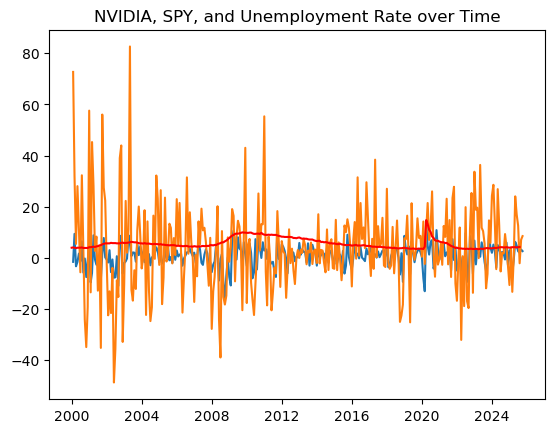

In [9]:
fig, ax1 = plt.subplots()
plt.title('NVIDIA, SPY, and Unemployment Rate over Time')
plt.plot(spy_data['Date'], spy_data['Close'])
plt.plot(nvidia_data['Date'], nvidia_data['Close'])
plt.plot(fred_data['Date'], fred_data['Value'], color = 'red')